<a href="https://colab.research.google.com/github/shinjiyeong/homework_textmining/blob/main/wk5_%EC%8B%A0%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ujson
# import json도 사용가능
from kiwipiepy import Kiwi

CHK_POSES = {"NNG", "NNP", "VV", "VA" "XR"} # 명사와 어근
INPUT_FILE_NAME = "mayor_news_morph.jsonl"

article_nums = []
dates = []
publishers = []
titles = []
urls = []
mayors = []
documents = []

mayor_idxes = dict()

kiwi = Kiwi()

with open(INPUT_FILE_NAME, 'r', encoding="UTF-8") as input_file:
    for idx, line in enumerate(input_file):
        data = ujson.loads(line)
        article_nums.append(data["article_num"])
        dates.append(data["date"])
        publishers.append(data["publisher"])
        titles.append(data["title"])
        urls.append(data["url"])
        mayors.append(data["mayor"])
        mayor_idxes.update({data["mayor"]: idx})

        word_mas = []

        body_sent = [sent.text for sent in kiwi.split_into_sents(data["body"])]
        for sent in body_sent:
            word_mas.append([token.form for token in kiwi.tokenize(sent) if token.tag in CHK_POSES])

        desc_mas = data["title_ma"] #description_ma: 형태소분석 해놓은 결과. 단위는 문서. 하나씩 꺼내면 문장
        # 문장별로 가져온다.
        for desc_ma in desc_mas:
            word_ma = [lex + "다" if pos in {"VA", "VV"} else lex for lex, pos in desc_ma if pos in CHK_POSES]
            word_mas.append(word_ma)

        documents.append(word_mas)

        articles = {
            "article_num": article_nums,
            "date": dates,
            "publisher": publishers,
            "mayor": mayors,
            "title": titles,
            "url": urls,
            "wordset": documents
        }

In [ ]:
articles["wordset"][mayor_idxes["오세훈"]]

[['강남구',
  '구청장',
  '신연희',
  '보건',
  '복지부',
  '발표',
  '외국인',
  '환자',
  '유치',
  '실적',
  '분석',
  '결과',
  '지나',
  '해',
  '외국인',
  '의료',
  '관광객',
  '유치',
  '명실',
  '한국',
  '의료',
  '관광',
  '메카',
  '증명',
  '헀'],
 ['지난해', '전국', '의료', '관광객', '차지', '수치', '앞서', '증가', '실적'],
 ['서울',
  '제외',
  '전국',
  '경기',
  '대구',
  '부산',
  '앞서',
  '성과',
  '서울시',
  '찾',
  '외국인',
  '환자',
  '강남',
  '다녀가',
  '밝혀지'],
 ['강남구',
  '찾',
  '외국인',
  '환자',
  '국가',
  '순위',
  '보',
  '미국',
  '중국',
  '일본',
  '러시아',
  '순',
  '나타나'],
 ['중국', '환자', '수', '전년도', '대비', '러시아', '환자', '수', '증가', '나타나'],
 ['외국인', '피부', '성형', '검진', '내과', '진료', '목적', '병원', '다녀가', '발표'],
 ['강남구', '성과', '내', '의료관광', '지원', '대하', '강남구', '열정', '덕분'],
 ['지나',
  '처음',
  '의료',
  '관광',
  '전담',
  '팀',
  '구성',
  '기점',
  '지난해',
  '의료',
  '기관',
  '유치',
  '업자',
  '외국인',
  '환자',
  '유치',
  '활동',
  '적극',
  '지원',
  '위하',
  '강남구',
  '의료',
  '관광',
  '활성',
  '관하',
  '조례',
  '제정'],
 ['지역',
  '외국인',
  '환자',
  '유치',
  '의료',
  '기관',
  '대상',
  '강남구',
  '의료',
  '관광',
  '협의회',
  '구성'

In [ ]:
from collections import Counter

NUM = 2
MAYORS = ["오세훈", "박원순", "이명박"]

for mayor in MAYORS:
    bodys = articles["wordset"][mayor_idxes[mayor]]
    ngram_count = Counter()

    for body in bodys:
        ngrams = list(zip(*[body[i:] for i in range(NUM)]))
        ngram_count.update(ngrams)

    print("========= {} =========".format(mayor))
    for (word, count) in ngram_count.most_common(20):
        print("{}\t\t{}".format(" & ".join(word), count))
    print()
    print()

========= 오세훈 =========
의료 & 관광		8
외국인 & 환자		7
환자 & 유치		5
의료 & 관광객		4
의료 & 기관		3
강남구 & 의료		3
관광객 & 유치		2
메카 & 증명		2
찾 & 외국인		2
강남구 & 찾		2
환자 & 수		2
관광 & 활성		2
활성 & 위하		2
강남구 & 구청장		1
구청장 & 신연희		1
신연희 & 보건		1
보건 & 복지부		1
복지부 & 발표		1
발표 & 외국인		1
유치 & 실적		1


========= 박원순 =========
아동 & 친화		3
친화 & 도시		3
건강 & 안전		2
안전 & 도시		2
도시 & 아동		2
도시 & 조성		2
역점 & 사업		2
건강 & 도시		2
환경 & 만들		2
센터 & 운영		2
급식 & 관리		2
김영종 & 종로구청장		1
종로구청장 & 건강		1
조성 & 역점		1
역점 & 김영종		1
김영종 & 구청장		1
구청장 & 건강		1
도시 & 조		1
조 & 구		1
구 & 역점		1


========= 이명박 =========
마라톤 & 대회		7
서울 & 국제		6
국제 & 마라톤		6
이 & 시장		3
세계 & 마라톤		2
대회 & 동아		2
동아 & 마라톤		2
세계 & 시민		2
이번 & 대회		2
남산 & 산책로		2
서울 & 시민		2
국내외 & 마라톤		1
마라톤 & 선수		1
선수 & 모두		1
모두 & 승자		1
한국 & 지영준		1
지영준 & 선수		1
선수 & 폴		1
폴 & 터갓		1
터갓 & 케냐		1




In [ ]:
import math

bodys = {}

for mayor in MAYORS:
    bodys[mayor] = articles["wordset"][mayor_idxes[mayor]]

    unigram_count = Counter()
    bigram_count = Counter()

    ppmis = Counter()

    for body in bodys[mayor]:
        unigram_count.update(body)

        bigram = list(zip(*[body[i:] for i in range(2)]))
        bigram_count.update(bigram)

    N = sum(unigram_count.values())

    for (left_w, right_w), count in bigram_count.items():
        pmi = math.log2((N * count) / (unigram_count[left_w] * unigram_count[right_w]))
        ppmi = max(pmi, 0.0)
        ppmis[(left_w, right_w)] = ppmi

    print("========= {} =========".format(mayor))
    for (bigram, count) in ppmis.most_common(10):
        print("{}\t\t{}".format(" & ".join(bigram), count))
    print()
    print()

========= 오세훈 =========
구청장 & 신연희		8.055282435501189
신연희 & 보건		8.055282435501189
보건 & 복지부		8.055282435501189
분석 & 결과		8.055282435501189
차지 & 수치		8.055282435501189
서울 & 제외		8.055282435501189
경기 & 대구		8.055282435501189
대구 & 부산		8.055282435501189
순위 & 보		8.055282435501189
보 & 미국		8.055282435501189


========= 박원순 =========
조 & 구		7.129283016944966
삼 & 심혈		7.129283016944966
심혈 & 기울이		7.129283016944966
구정 & 전반		7.129283016944966
개념 & 반영		7.129283016944966
반영 & 정책		7.129283016944966
정책 & 수립		7.129283016944966
포장 & 방식		7.129283016944966
방식 & 혁신		7.129283016944966
보도 & 설치		7.129283016944966


========= 이명박 =========
모두 & 승자		8.312882955284355
한국 & 지영준		8.312882955284355
폴 & 터갓		8.312882955284355
터갓 & 케냐		8.312882955284355
본보 & 서울시		8.312882955284355
서울시 & 공동		8.312882955284355
공동 & 주최		8.312882955284355
을 & 알리		8.312882955284355
코스 & 복원		8.312882955284355
포함 & 감회		8.312882955284355




In [ ]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from pprint import pprint
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser

for mayor in MAYORS:
    gen_phrases = Phrases(bodys[mayor], min_count=5, threshold=0.4, scoring="npmi") # npmi 양수로 가면 association이 강함.
    gen_bigram = Phraser(gen_phrases) # Training된 것으로 적용

    print("================ {} ================".format(mayor))
    for bi_sent, sent in zip(gen_bigram[bodys[mayor]][:10], bodys[mayor][:10]):
        if len(sent) > 2:
            print("unigram: {}".format(sent))
            print("bigram: {}".format(bi_sent))
            print()
    print("=====================================")
    print()

================ 오세훈 ================
unigram: ['강남구', '구청장', '신연희', '보건', '복지부', '발표', '외국인', '환자', '유치', '실적', '분석', '결과', '지나', '해', '외국인', '의료', '관광객', '유치', '명실', '한국', '의료', '관광', '메카', '증명', '헀']
bigram: ['강남구', '구청장', '신연희', '보건', '복지부', '발표', '외국인_환자', '유치', '실적', '분석', '결과', '지나', '해', '외국인', '의료', '관광객', '유치', '명실', '한국', '의료_관광', '메카', '증명', '헀']

unigram: ['지난해', '전국', '의료', '관광객', '차지', '수치', '앞서', '증가', '실적']
bigram: ['지난해', '전국', '의료', '관광객', '차지', '수치', '앞서', '증가', '실적']

unigram: ['서울', '제외', '전국', '경기', '대구', '부산', '앞서', '성과', '서울시', '찾', '외국인', '환자', '강남', '다녀가', '밝혀지']
bigram: ['서울', '제외', '전국', '경기', '대구', '부산', '앞서', '성과', '서울시', '찾', '외국인_환자', '강남', '다녀가', '밝혀지']

unigram: ['강남구', '찾', '외국인', '환자', '국가', '순위', '보', '미국', '중국', '일본', '러시아', '순', '나타나']
bigram: ['강남구', '찾', '외국인_환자', '국가', '순위', '보', '미국', '중국', '일본', '러시아', '순', '나타나']

unigram: ['중국', '환자', '수', '전년도', '대비', '러시아', '환자', '수', '증가', '나타나']
bigram: ['중국', '환자', '수', '전년도', '대비', '러시아', '환자', '수', 

In [ ]:
print(bodys["박원순"][0])

['김영종', '종로구청장', '건강', '안전', '도시', '아동', '친화', '도시', '조성', '역점', '김영종', '구청장', '건강', '안전', '도시', '아동', '친화', '도시', '조', '구', '역점', '사업', '삼', '심혈', '기울이', '계획']


In [ ]:
from collections import Counter
from collections import defaultdict

from itertools import combinations

from operator import itemgetter

cooccurance_count = {}
cooccurance_list = {}

for mayor in MAYORS:

    cooc_count = defaultdict(Counter)

    for body in bodys[mayor]:
        body = sorted(set(body))

        for word_l, word_r in combinations(body, 2):
            cooc_count[word_l][word_r] += 1

    cooccurance_count[mayor] = cooc_count

    cooc_list = []
    for word_l, word_r_count in cooccurance_count[mayor].items():
        for word_r, count in word_r_count.items():
            cooc_list.append((word_l, word_r, count))

    cooccurance_list[mayor] = sorted(cooc_list, key=itemgetter(2), reverse=True)

In [ ]:
for mayor in MAYORS:
    print("================ {} ================".format(mayor))

    for (word_l, word_r, count) in cooccurance_list[mayor][:10]:
        print("{} \t+\t {} \t=\t {}".format(word_l, word_r, count))

    print("=====================================")
    print()

================ 오세훈 ================
외국인 	+	 환자 	=	 7
강남구 	+	 외국인 	=	 6
강남구 	+	 환자 	=	 6
강남구 	+	 의료 	=	 5
관광 	+	 의료 	=	 5
외국인 	+	 의료 	=	 5
유치 	+	 의료 	=	 5
의료 	+	 환자 	=	 5
강남구 	+	 관광 	=	 4
강남구 	+	 유치 	=	 4

================ 박원순 ================
계획 	+	 도시 	=	 3
계획 	+	 사업 	=	 3
계획 	+	 위하 	=	 3
도시 	+	 위하 	=	 3
도시 	+	 환경 	=	 3
건강 	+	 도시 	=	 2
계획 	+	 아동 	=	 2
계획 	+	 조성 	=	 2
계획 	+	 친화 	=	 2
계획 	+	 종로 	=	 2

================ 이명박 ================
마라톤 	+	 서울 	=	 7
마라톤 	+	 세계 	=	 6
국제 	+	 마라톤 	=	 6
국제 	+	 서울 	=	 6
국제 	+	 세계 	=	 6
서울 	+	 세계 	=	 6
마라톤 	+	 말 	=	 5
대회 	+	 마라톤 	=	 5
대회 	+	 세계 	=	 5
마라톤 	+	 시민 	=	 4



================== 오세훈 ==================


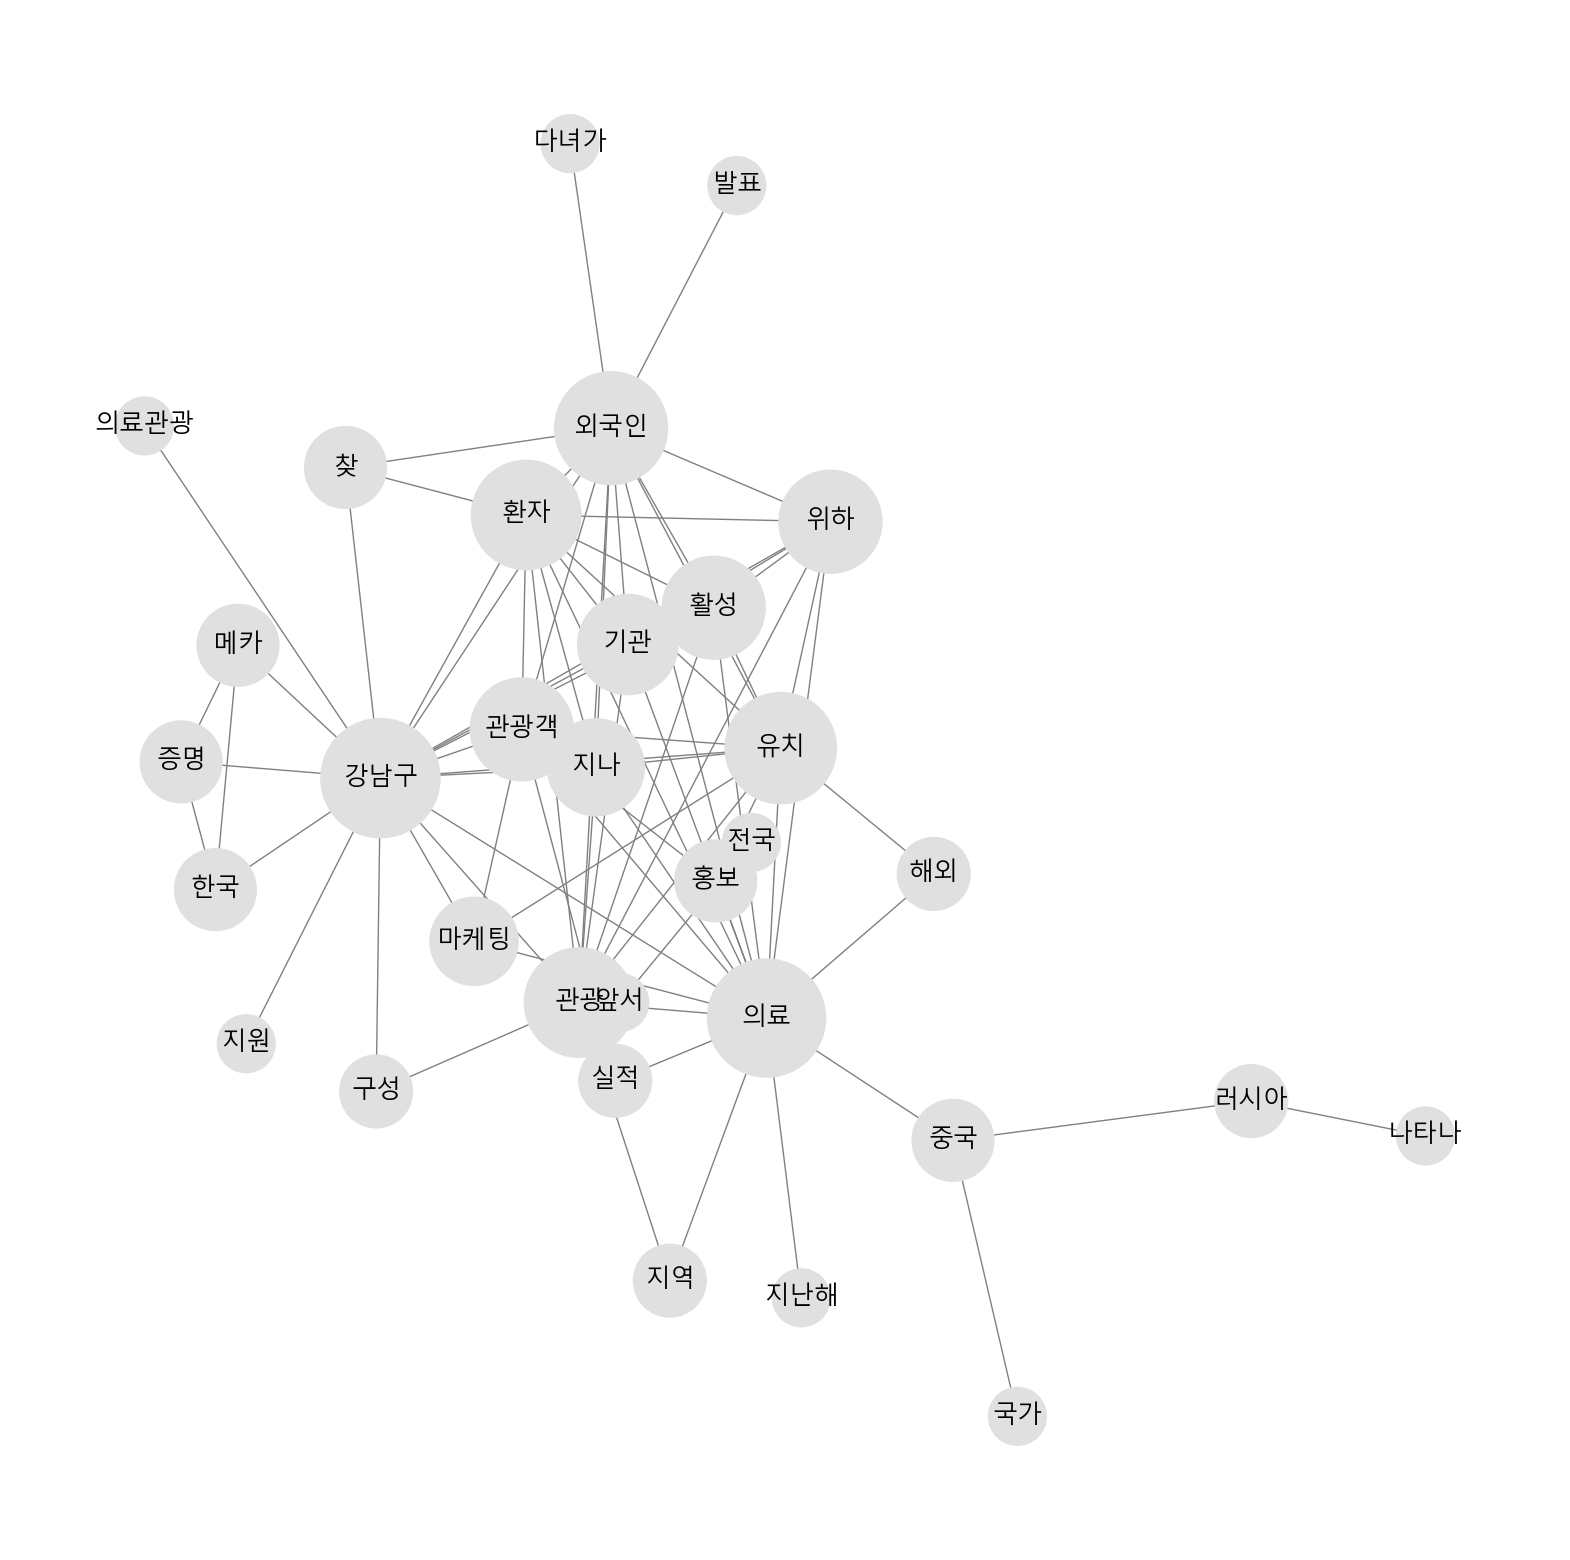

================== 박원순 ==================


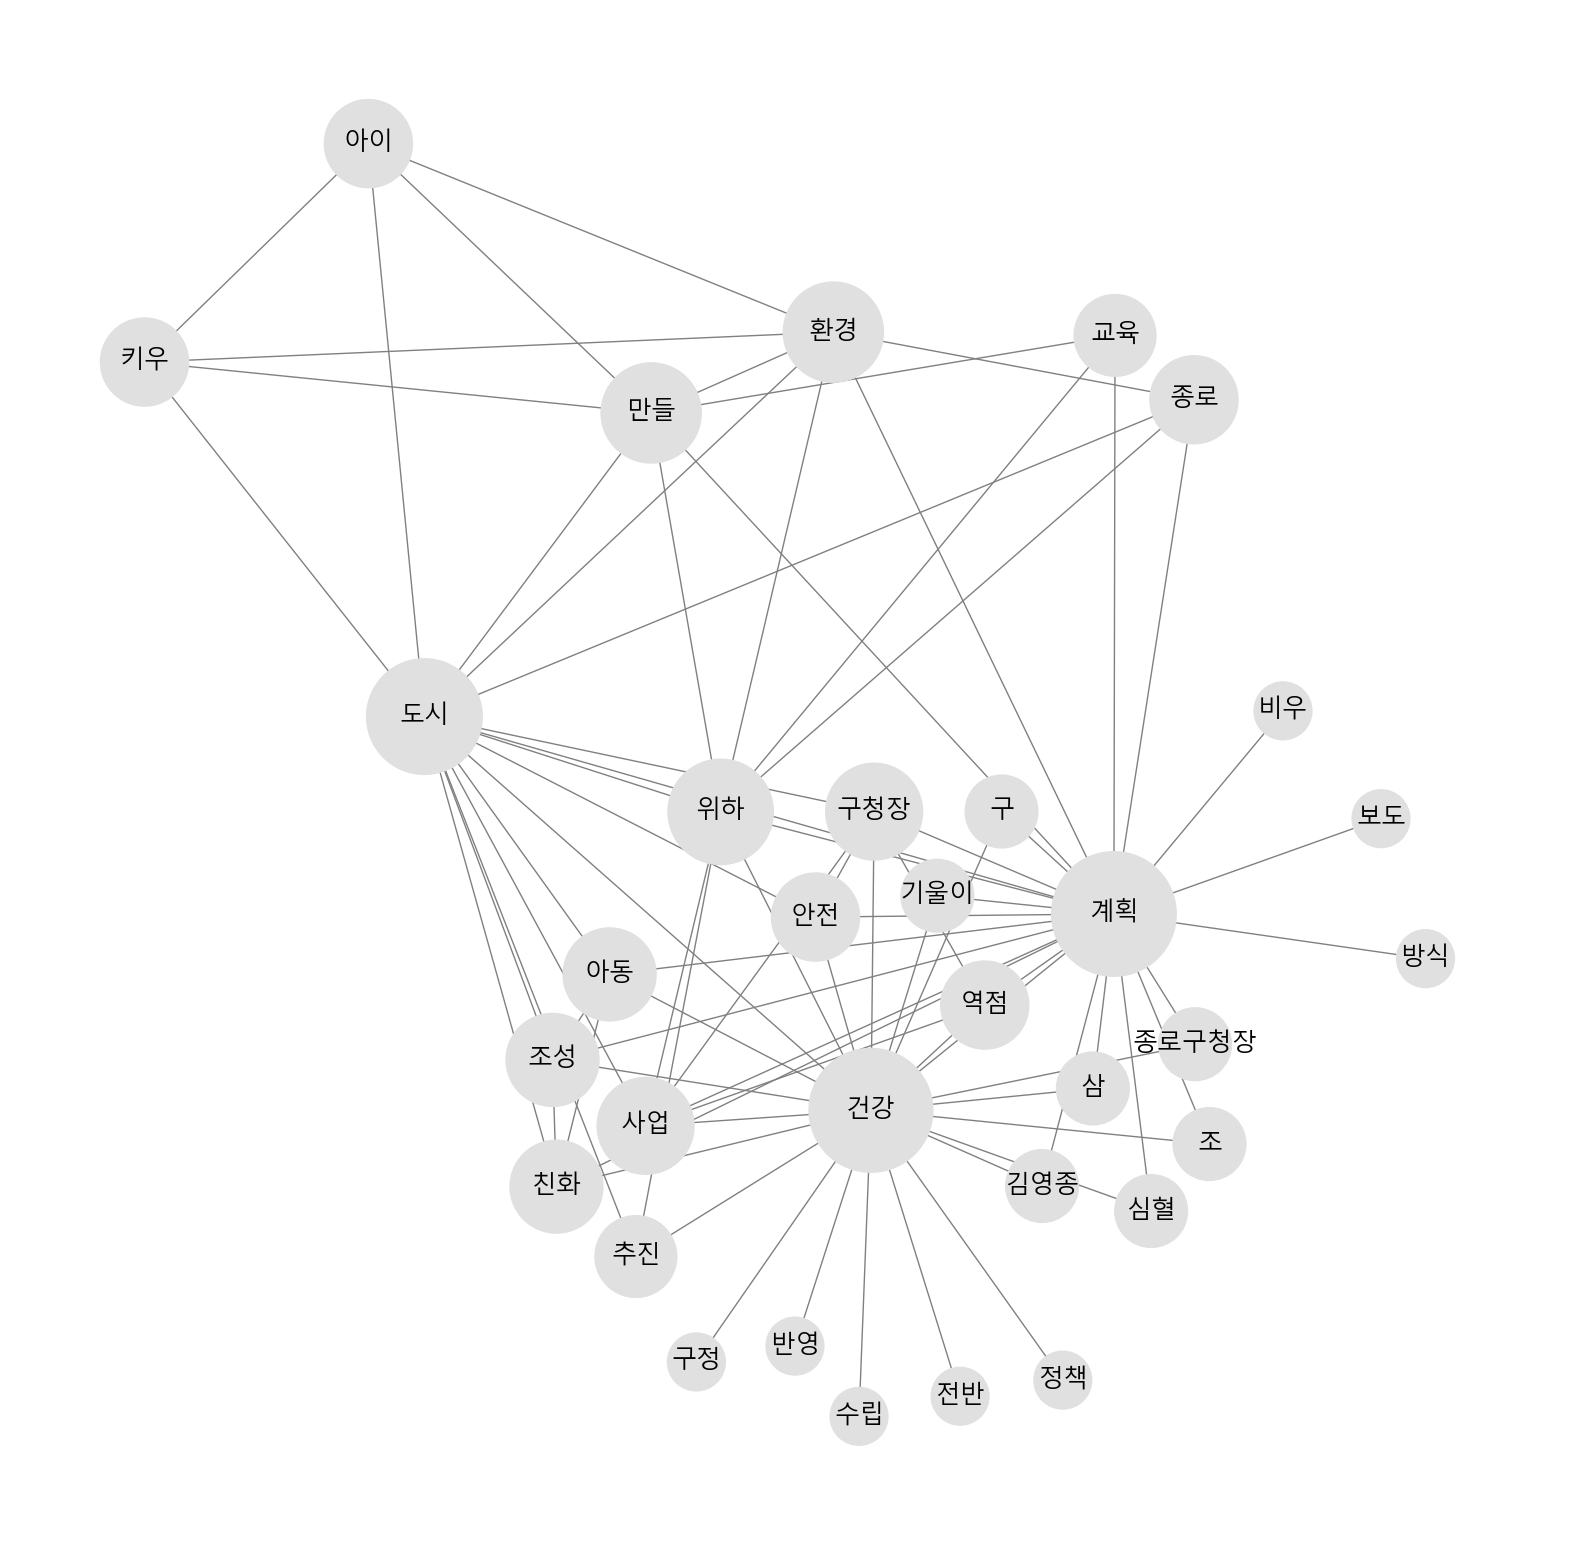

================== 이명박 ==================


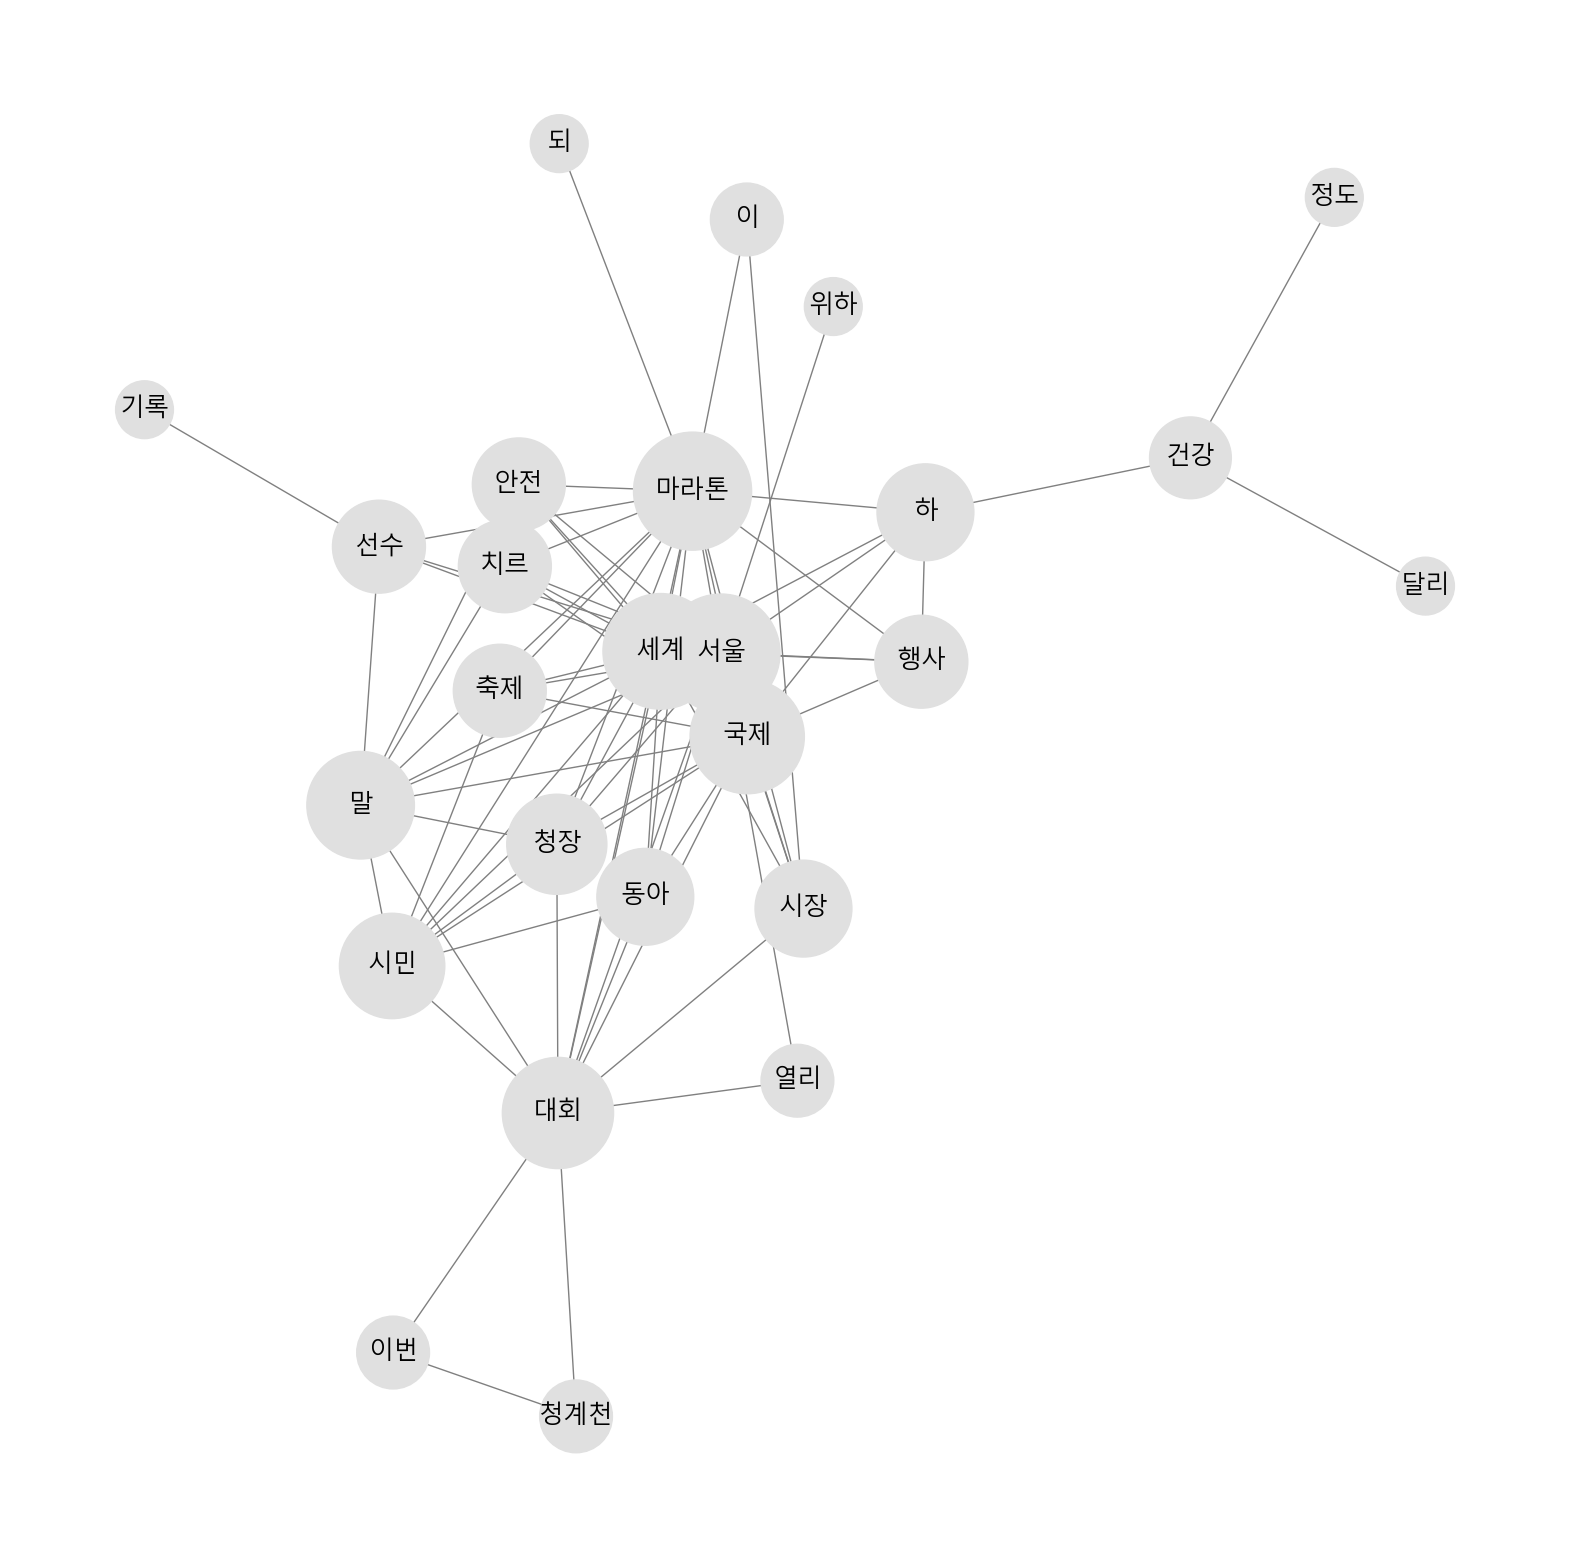

In [ ]:
import sys
import math
import networkx as nx
import matplotlib.pyplot as plt

# warnings 안보이게 해줌
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

NODE_NUM = 80

general_networks = {}
for mayor in MAYORS:
    print("================== {} ==================".format(mayor))
    G = nx.Graph()

    for word_l, word_r, count in cooccurance_list[mayor][:NODE_NUM]:
        G.add_edge(word_l, word_r, weight=count)

    general_networks[mayor] = G

    sizes = [math.log(G.degree(n) + 1) * 2500 for n in G.nodes()]
    plt.figure(figsize = (20, 20))

    nx.draw_networkx(G,
                    pos = nx.kamada_kawai_layout(G, scale=1),
                    node_size = sizes,
                     node_color = '#e0e0e0',
                     edge_color = 'grey',
                     font_family = "malgun gothic", # "NanumGothic", "malgun gothic" 또는 "AppleGothic"
                     #label_pos = 0.5, # [0 - 1], Head to Tail
                     with_labels = True,
                     font_size = 18
                    )

    plt.axis("off")
    plt.show()

================== 오세훈 ==================


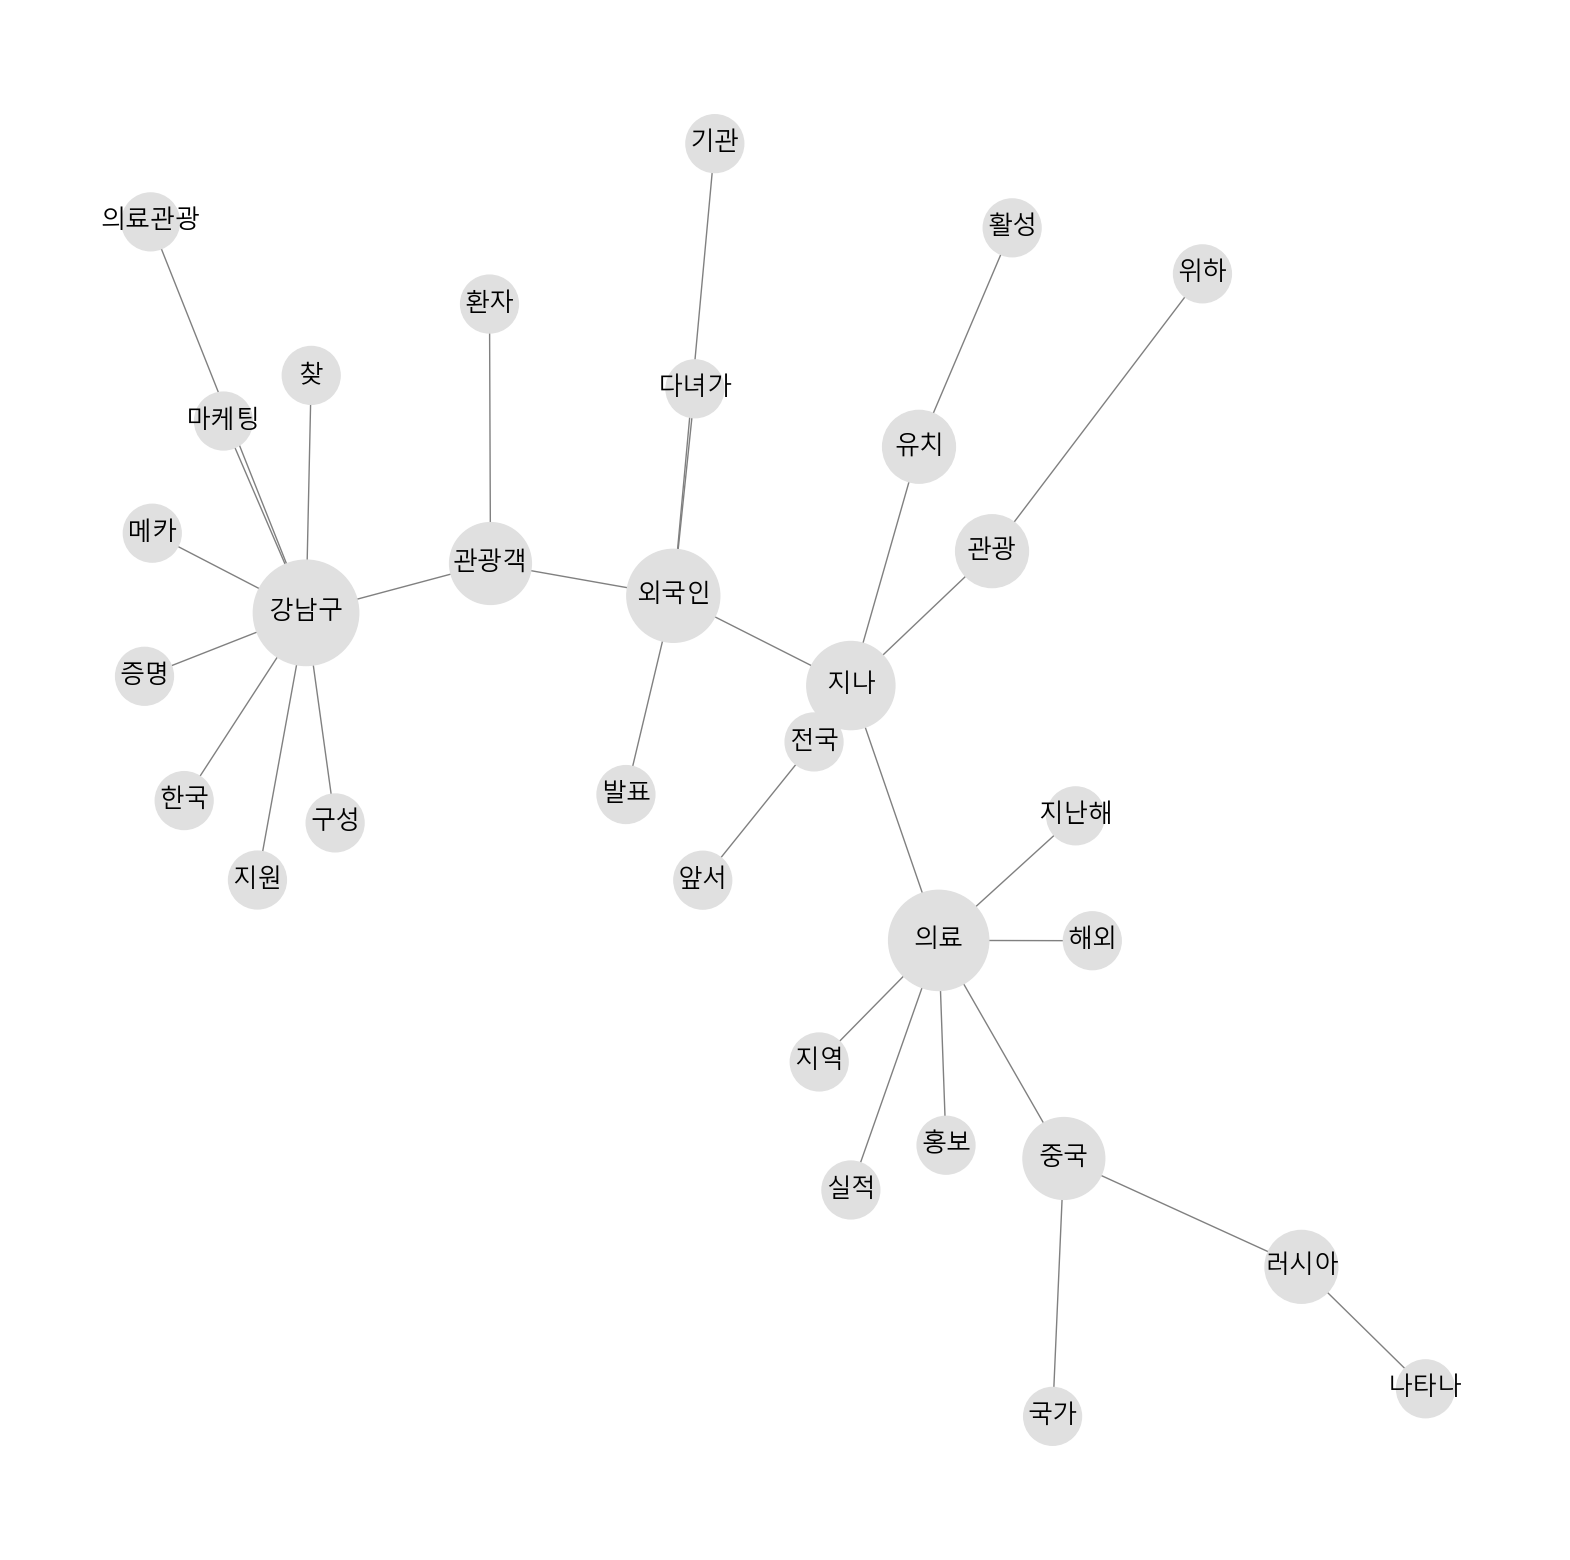

================== 박원순 ==================


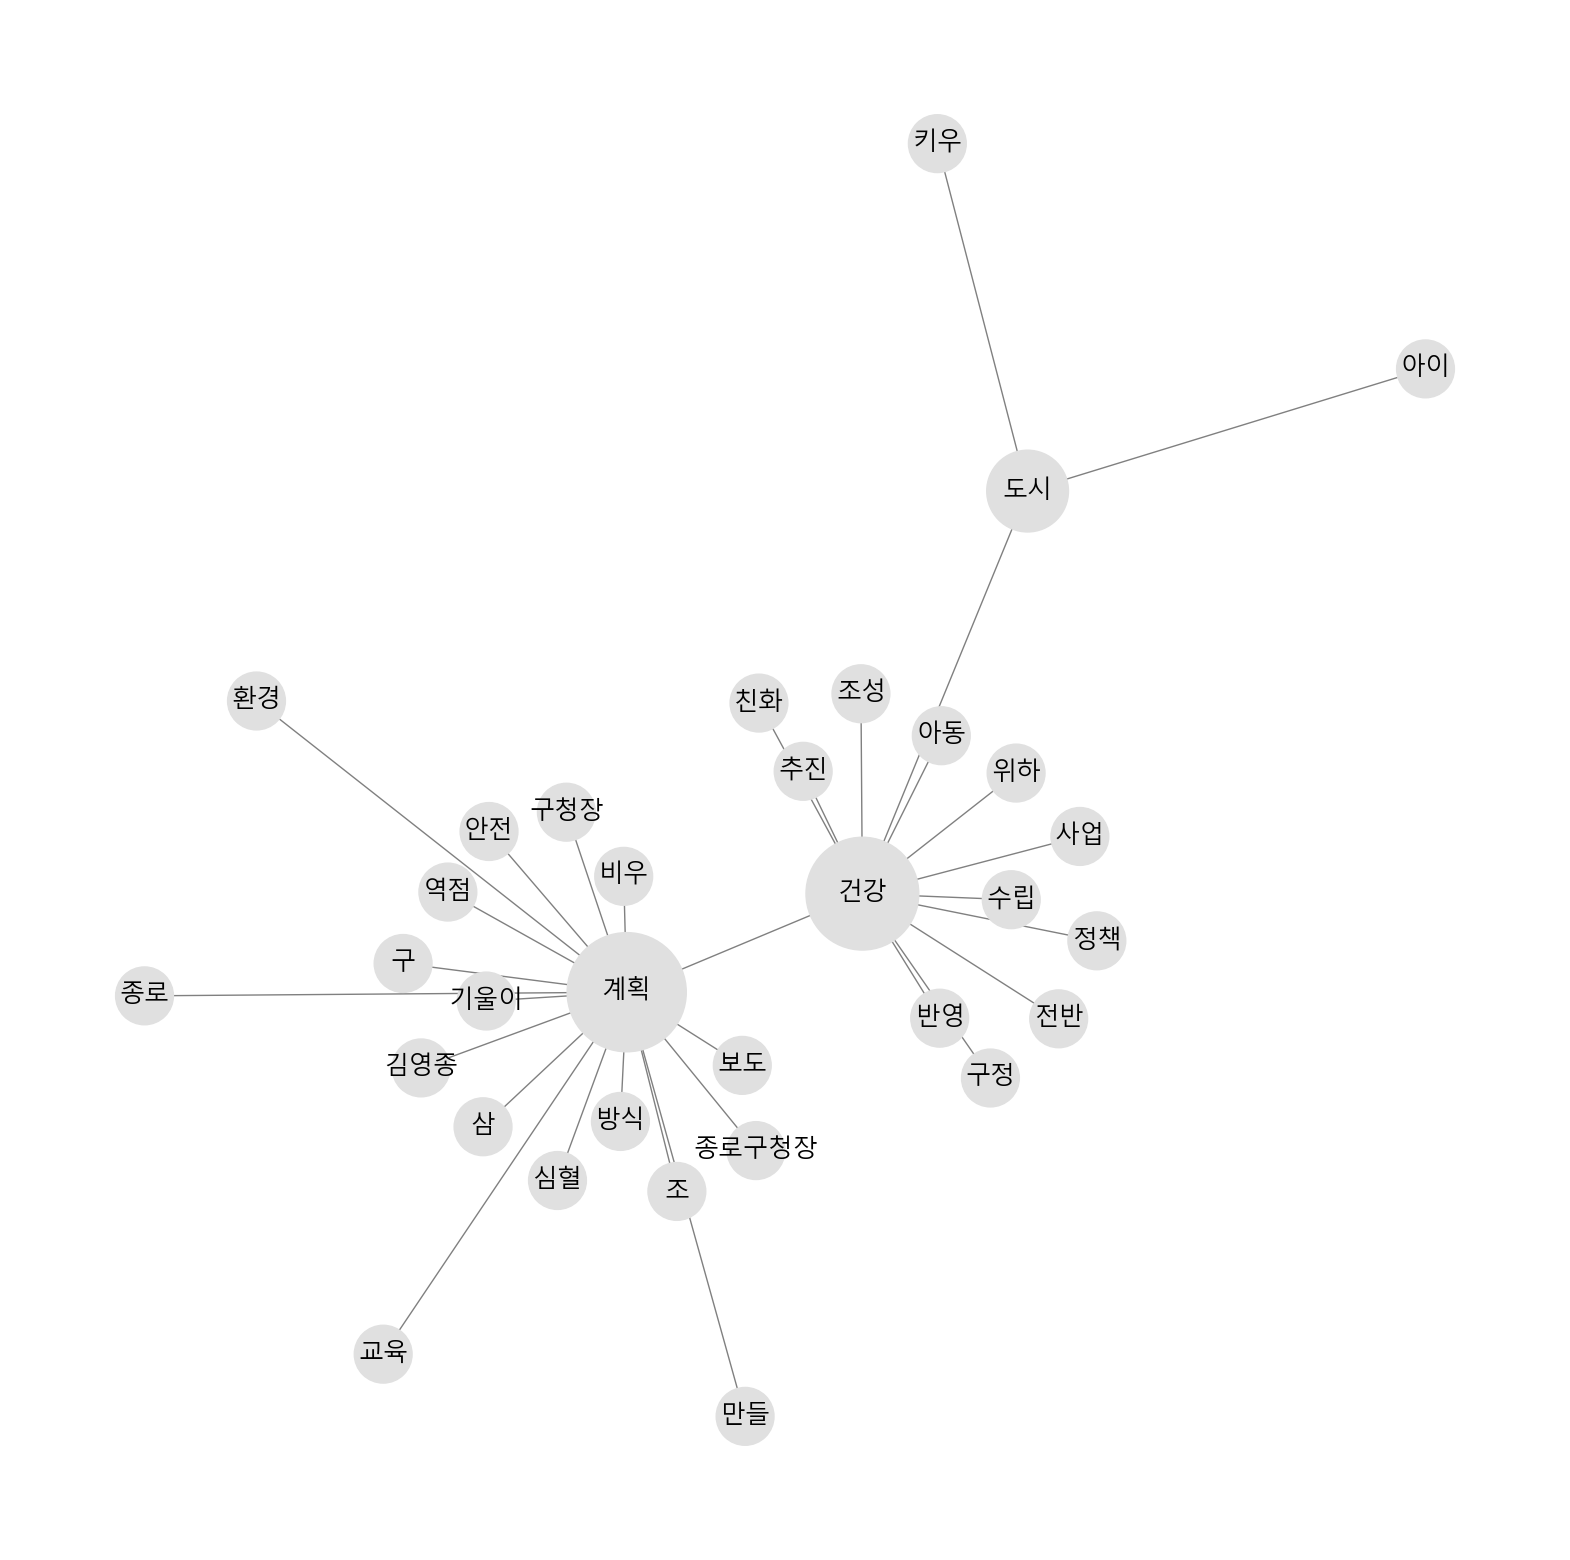

================== 이명박 ==================


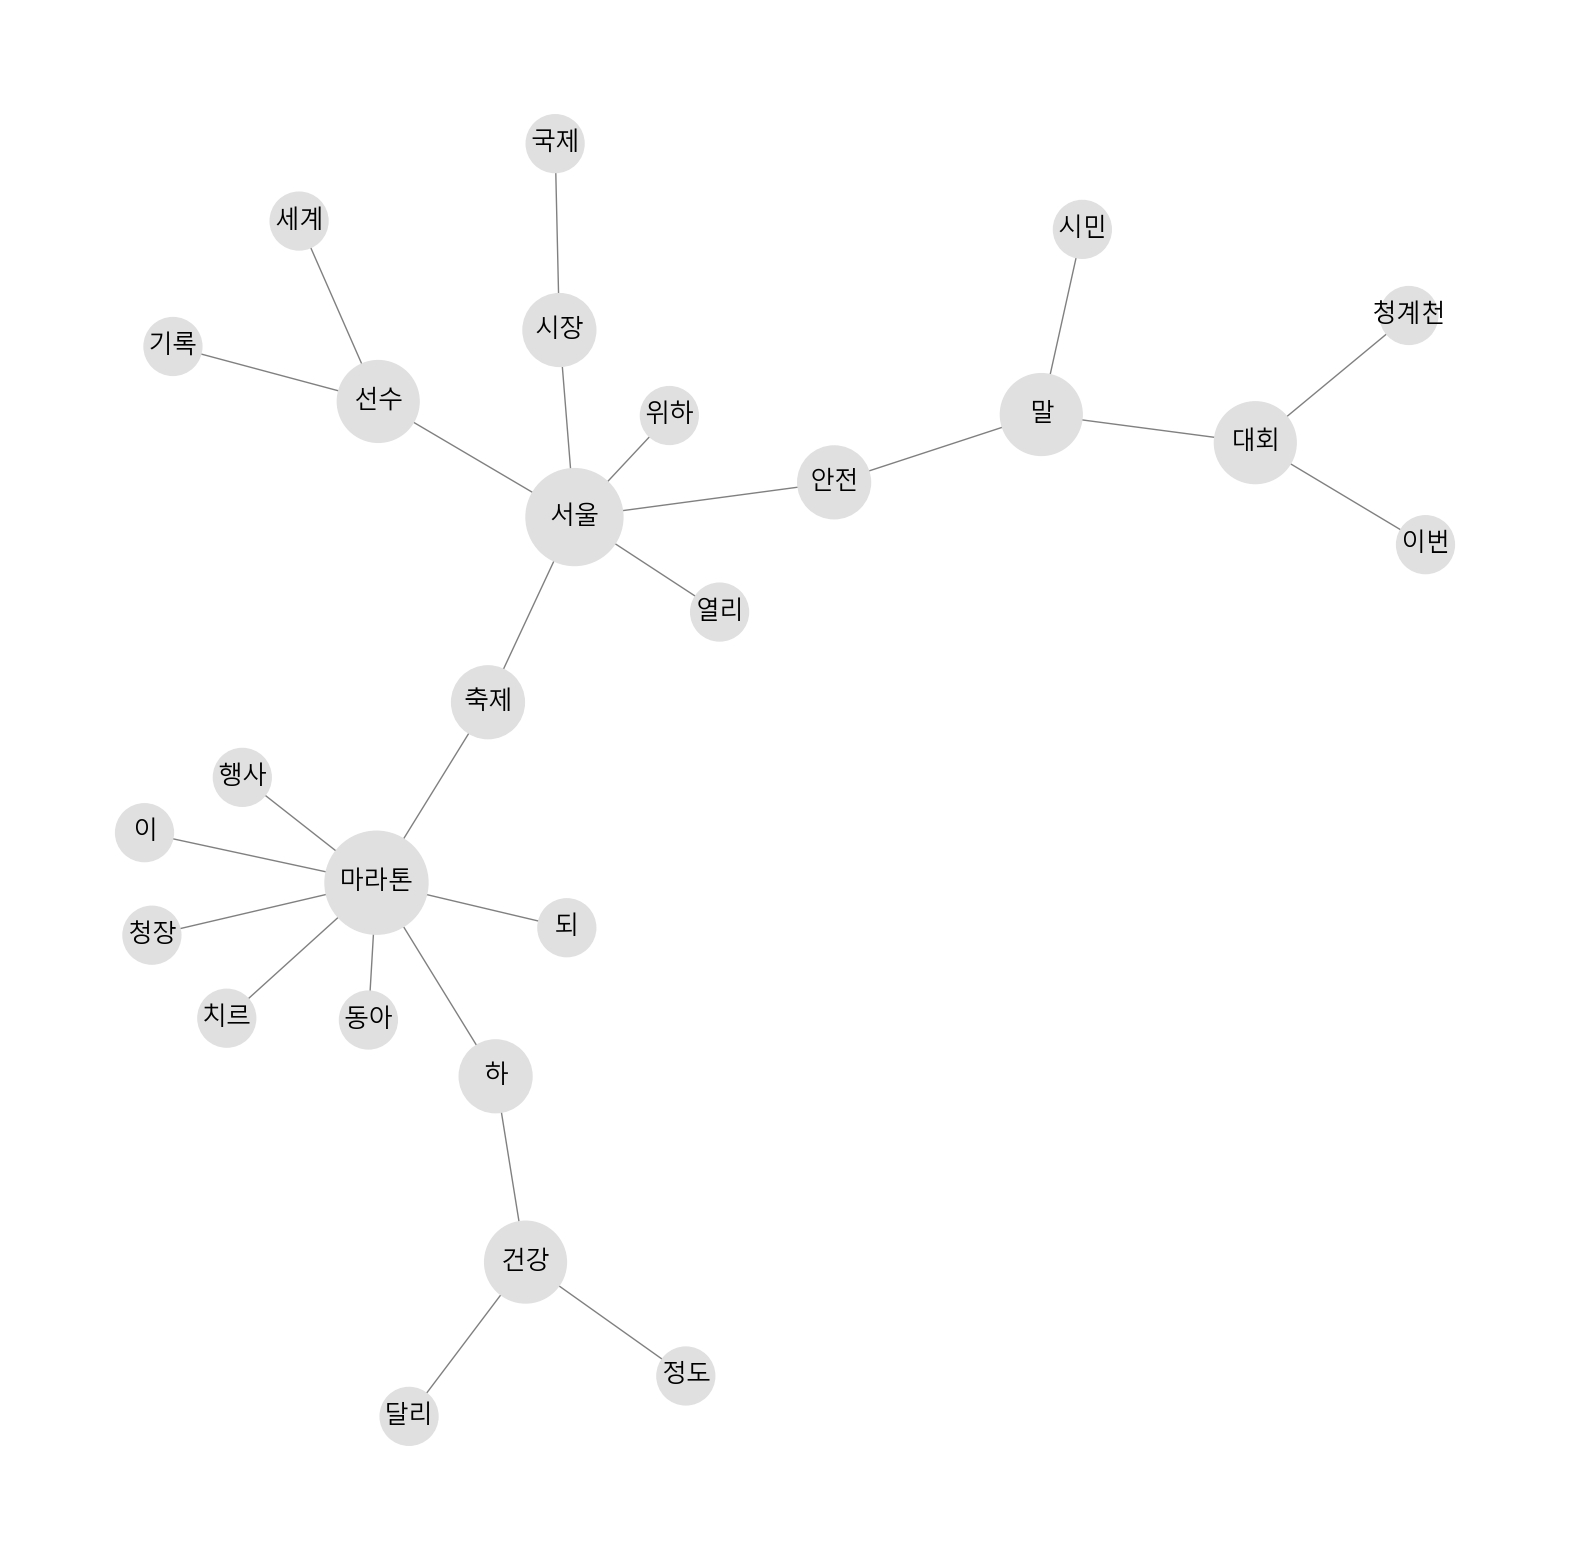

In [ ]:
spanning_networks = {}
for mayor in MAYORS:
    print("================== {} ==================".format(mayor))
    S = nx.minimum_spanning_tree(general_networks[mayor]) # 기존 네트워크를 가져온다.
    sizes = [math.log(S.degree(n) + 1) * 2500 for n in S.nodes()]
    plt.figure(figsize = (20, 20))

    spanning_networks[mayor] = S

    nx.draw_networkx(S,
                    pos = nx.kamada_kawai_layout(S, scale=1),
                    node_size = sizes,
                     node_color = '#e0e0e0',
                     edge_color = 'grey',
                     font_family = "malgun gothic", #"NanumGothic", "malgun gothic" 또는 "AppleGothic"
                     #label_pos = 0.5, # [0 - 1], Head to Tail
                     with_labels = True,
                     font_size = 18
                    )

    plt.axis("off")
    plt.show()

In [ ]:
for mayor in MAYORS:
    nodes = general_networks[mayor].nodes()

    degree_cents = nx.degree_centrality(general_networks[mayor])
    closeness_cents = nx.closeness_centrality(general_networks[mayor])
    betweenness_cents = nx.betweenness_centrality(general_networks[mayor])

    print(" ============ {} ============ ".format(mayor))
    print("\t\t{}\t{}\t{}".format("degree", "closeness", "betweenness"))

    for node in list(nodes)[:20]:
        print("{:<10}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(node, degree_cents[node],
                                                      closeness_cents[node],
                                                      betweenness_cents[node]))
    print()

 ============ 오세훈 ============ 
		degree	closeness	betweenness
외국인       		0.4194		0.5537		0.1342
환자        		0.3548		0.5319		0.0159
강남구       		0.5806		0.6166		0.3236
의료        		0.5484		0.6459		0.3723
관광        		0.3548		0.5319		0.0396
유치        		0.3871		0.5426		0.0416
위하        		0.2581		0.5024		0.0003
관광객       		0.2581		0.5024		0.0270
의료관광      		0.0323		0.3768		0.0000
기관        		0.2258		0.4933		0.0000
활성        		0.2581		0.5024		0.0003
찾         		0.0968		0.3990		0.0000
러시아       		0.0645		0.3014		0.0602
중국        		0.0968		0.4239		0.1720
마케팅       		0.1290		0.4522		0.0000
메카        		0.0968		0.3876		0.0000
증명        		0.0968		0.3876		0.0000
지나        		0.1935		0.4844		0.0000
한국        		0.0968		0.3876		0.0000
지원        		0.0323		0.3768		0.0000

 ============ 박원순 ============ 
		degree	closeness	betweenness
계획        		0.7500		0.8000		0.4177
도시        		0.4688		0.6531		0.1289
사업        		0.1875		0.5517		0.0024
위하        		0.2812		0.5818		0.0324
환경        		0.2188		0.5161		0.017